In [ ]:
# Import all the needed importing files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.stats import chisquare , chi2_contingency

In [3]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [12]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',"Data")

In [13]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
# infoemation of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [15]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Data Preprocessing

In [17]:
data['Experience'].replace({-3:3,-2:2,-1:1},inplace=True)

In [19]:
exp_mean=data['Experience'].loc[(data['Age']>=24) & (data['Age']<=30) ].mean()
exp_std=data['Experience'].loc[(data['Age']>=24) & (data['Age']<=30) ].std()
exp_zero_count=data['Experience'].loc[data['Experience']==0].value_counts()

In [24]:
blank_exp=np.random.randint(exp_mean-exp_std,exp_mean+exp_std,size=exp_zero_count)
data['Experience'].loc[data['Experience']==0]=blank_exp

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\BHUBESH\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-131f6dcbfeab>", line 2, in <module>
    data['Experience'].loc[data['Experience']==0]=blank_exp
  File "C:\Users\BHUBESH\Anaconda2\lib\site-packages\pandas\core\indexing.py", line 190, in __setitem__
    self._setitem_with_indexer(indexer, value)
  File "C:\Users\BHUBESH\Anaconda2\lib\site-packages\pandas\core\indexing.py", line 656, in _setitem_with_indexer
    value=value)
  File "C:\Users\BHUBESH\Anaconda2\lib\site-packages\pandas\core\internals\managers.py", line 510, in setitem
    return self.apply('setitem', **kwargs)
  File "C:\Users\BHUBESH\Anaconda2\lib\site-packages\pandas\core\internals\managers.py", line 395, in apply
    applied = getattr(b, f)(**kwargs)
  File "C:\Users\BHUBESH\Anaconda2\lib\site-packages\pandas\core\internals\blocks.py", line 872, 

ValueError: cannot set using a list-like indexer with a different length than the value

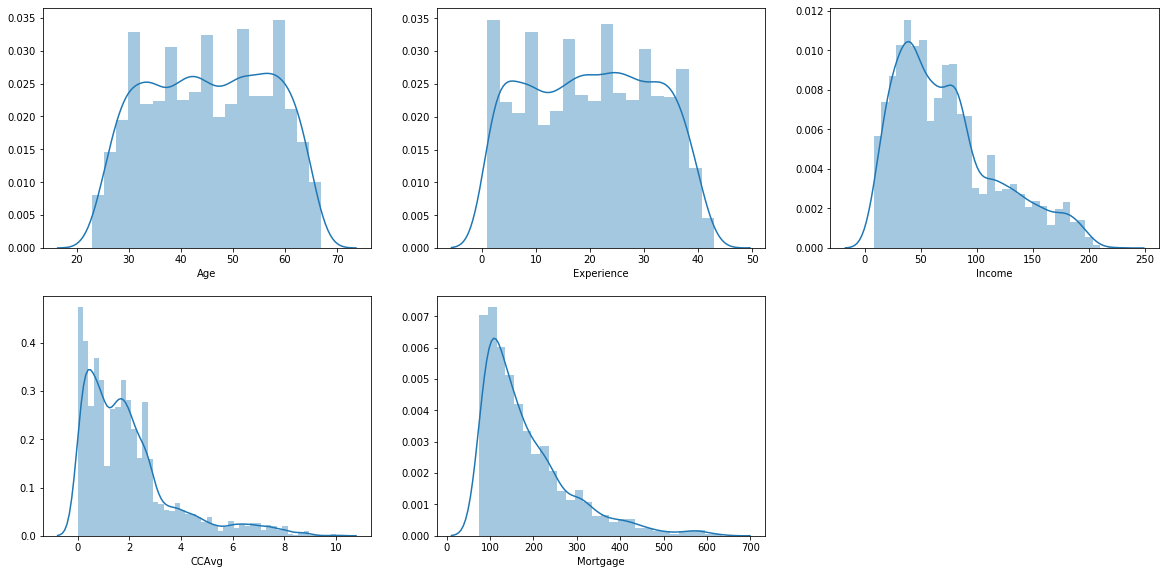

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data['Age'])
plt.subplot(3,3,2)
sns.distplot(data['Experience'])
plt.subplot(3,3,3)
sns.distplot(data['Income'])
plt.subplot(3,3,4)
sns.distplot(data['CCAvg'])
plt.subplot(3,3,5)
sns.distplot(data['Mortgage'].loc[data['Mortgage']!=0])


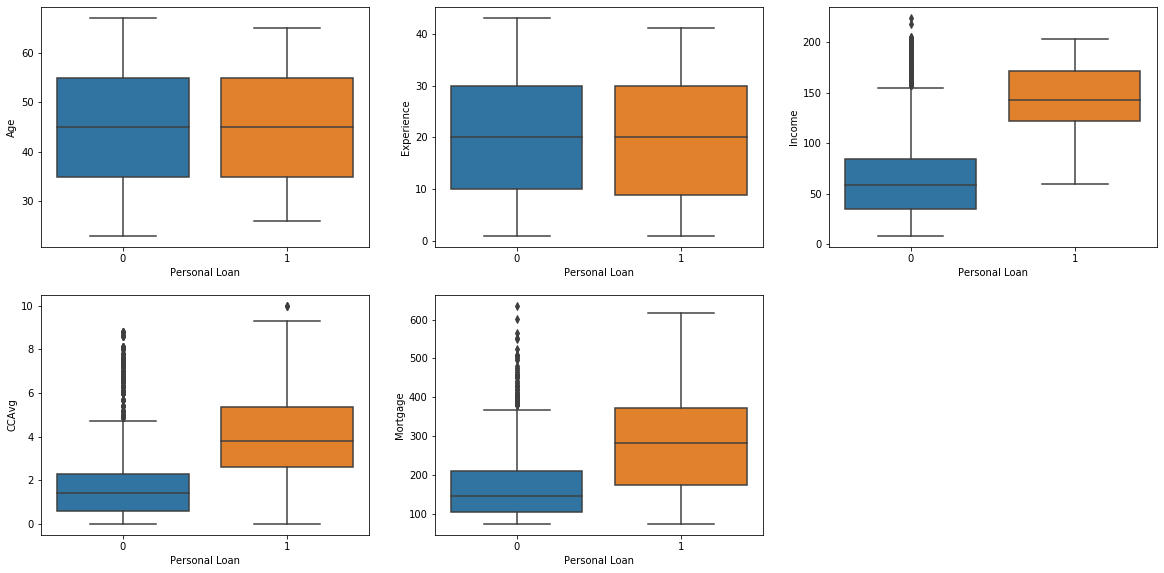

In [27]:
# checking the outliers of the column using boxplot

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Personal Loan',y='Age',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='Personal Loan',y='Experience',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Personal Loan',y='Income',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Personal Loan',y='CCAvg',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Personal Loan',y=data['Mortgage'].loc[data['Mortgage']!=0],data=data)

In [ ]:
# From the Above Figure . the CCAvg , income , Mortage columns has outliers asn thus they are rigt skewed

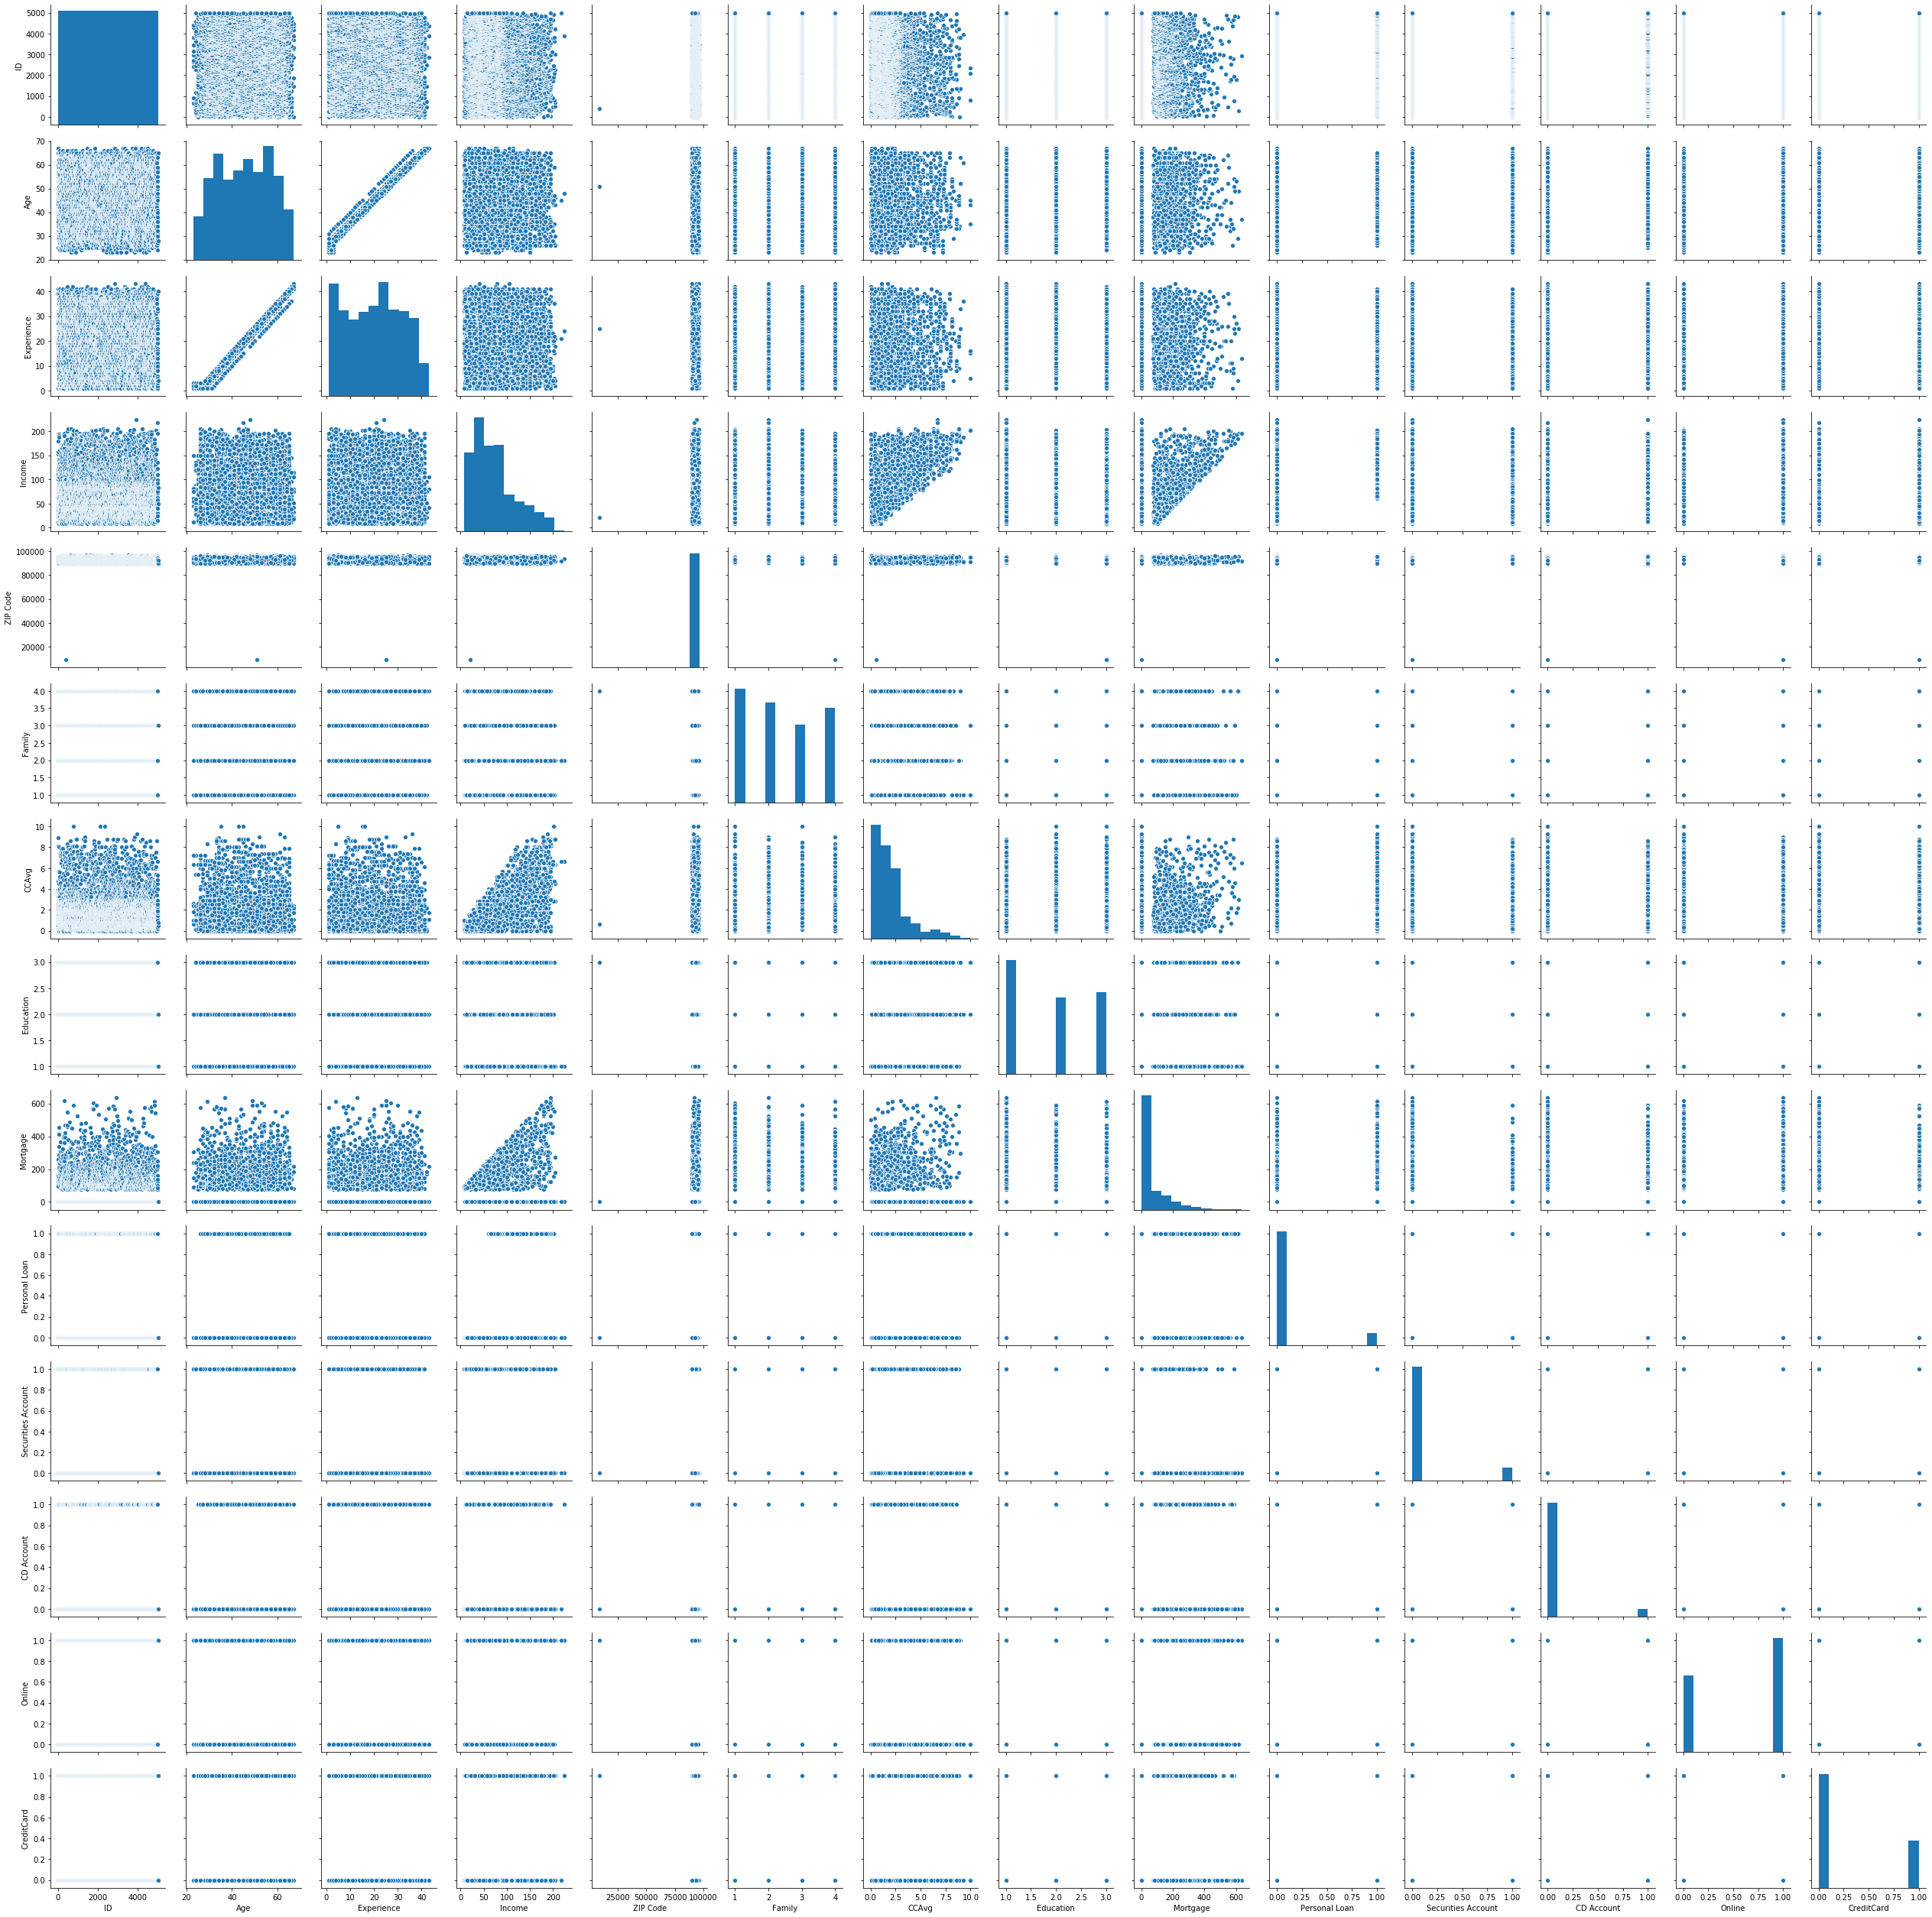

In [28]:
sns.pairplot(data)

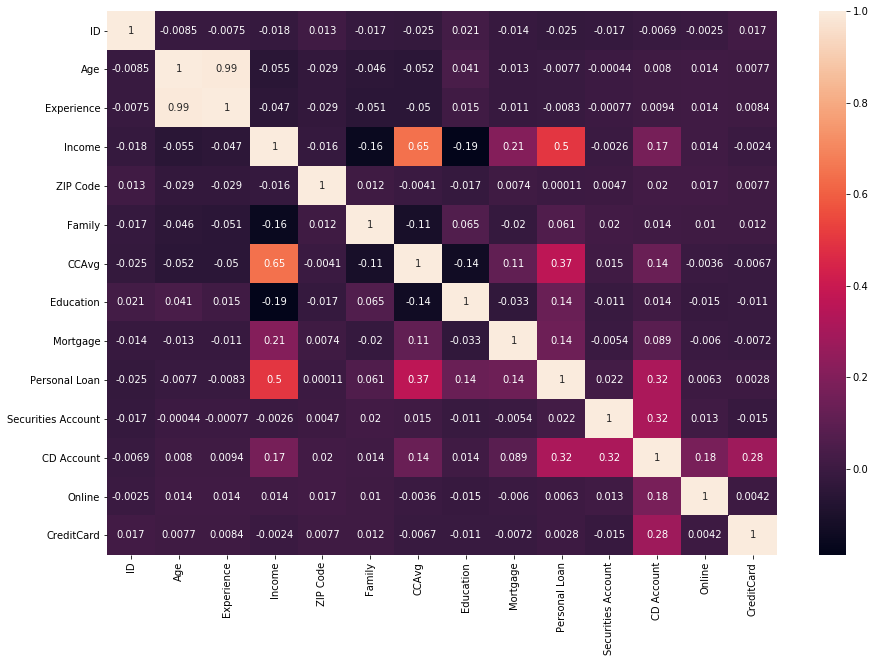

In [29]:
# Correlation the data
linear_corr = data.corr()
fig , ax = plt.subplots(figsize  =(15,10))
sns.heatmap(linear_corr , annot = True , ax =ax)

In [ ]:
 # the age ns Experrience are linearly correlated income and ccAvg are aprtilaly correlated

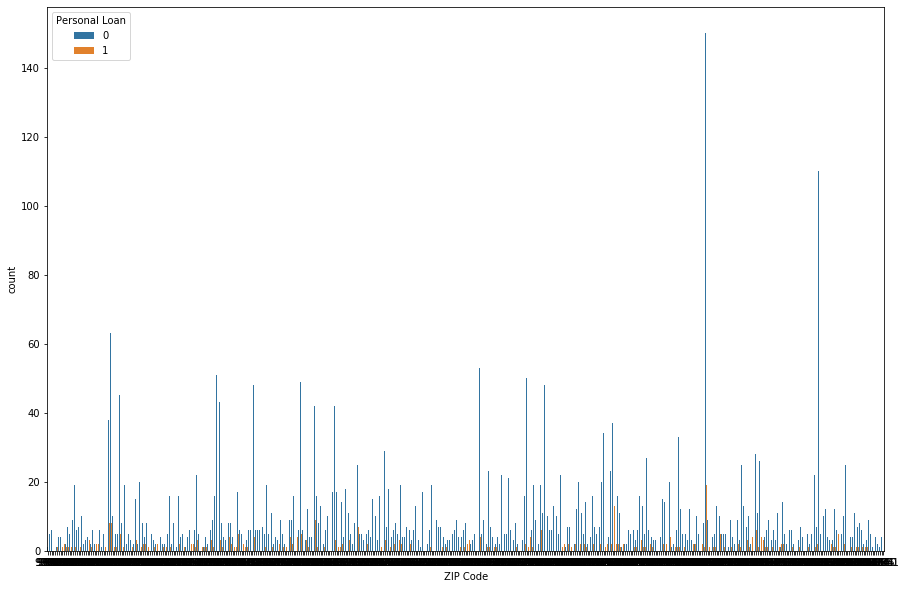

In [31]:
# countplot
fig ,ax = plt.subplots(figsize  =(15,10))
sns.countplot(x = "ZIP Code" , hue = 'Personal Loan' , data= data , ax= ax)

In [32]:
pd.crosstab(data['ZIP Code'] , data['Personal Loan'])

Personal Loan,0,1
ZIP Code,,
9307,1,0
90005,5,0
90007,6,0
90009,8,0
90011,3,0
90016,1,1
90018,4,0
90019,4,1
90024,49,1


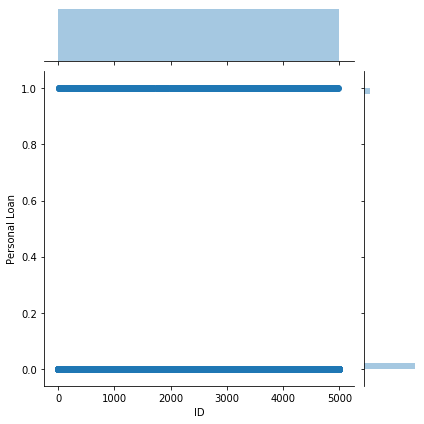

In [33]:
# JointPlot 
sns.jointplot(x = 'ID' , y = 'Personal Loan' , data = data)

In [ ]:
# from the above plots , we see that Id ,ZIP Code can be dropped , because since , they are not providing necessary info about the personal loan
# Age and the Experience are linearly dependent so we can drop one of them

In [34]:
# dropping 
drop_cols = ['Experience' , 'ID' , 'ZIP Code' ]
data.drop(columns = drop_cols, inplace = True)
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [36]:
print(data[['Personal Loan','Family']].groupby(['Family']).mean())
print(data[['Personal Loan','Education']].groupby(['Education']).mean())
print(data[['Personal Loan','Securities Account']].groupby(['Securities Account']).mean())

        Personal Loan
Family               
1            0.072690
2            0.081790
3            0.131683
4            0.109656
           Personal Loan
Education               
1               0.044370
2               0.129722
3               0.136576
                    Personal Loan
Securities Account               
0                        0.093792
1                        0.114943


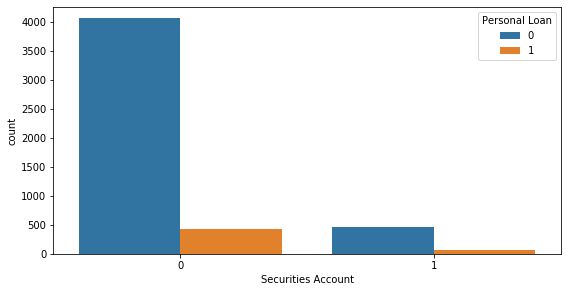

In [38]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Securities Account' , hue = 'Personal Loan' , data =data)

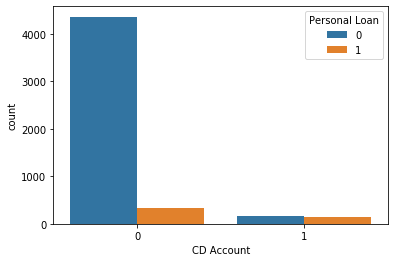

In [41]:

sns.countplot(x = 'CD Account' , hue = 'Personal Loan' , data =data)

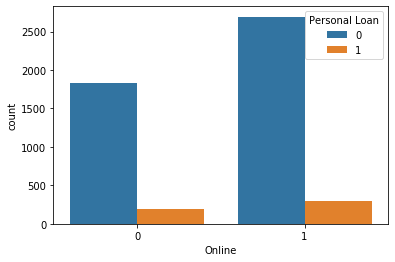

In [45]:
sns.countplot(x = 'Online' , hue = 'Personal Loan' , data =data)

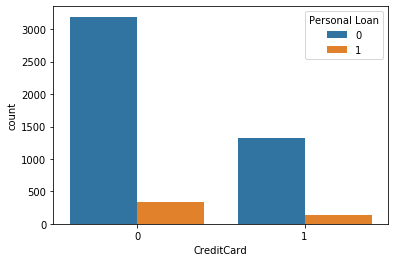

In [46]:
sns.countplot(x = 'CreditCard' , hue = 'Personal Loan' , data =data)

In [50]:
# To Check the dependency of the categorical vairables
cont1=pd.crosstab(data['Securities Account'],data['CD Account'])
print(chi2_contingency(cont1))

cont2=pd.crosstab(data['CreditCard'],data['CD Account'])
print(chi2_contingency(cont2))

cont3=pd.crosstab(data['CreditCard'],data['Online'])
print(chi2_contingency(cont3))

(498.2113233272827, 2.3289041632628143e-110, 1, array([[4207.5288,  270.4712],
       [ 490.4712,   31.5288]]))
(385.6503090218538, 7.325271343317597e-86, 1, array([[3316.788,  213.212],
       [1381.212,   88.788]]))
(0.07077078958228833, 0.7902178000627224, 1, array([[1423.296, 2106.704],
       [ 592.704,  877.296]]))


In [ ]:
# the p<0.05 for securities account , cd amount and creditcard , 

In [52]:
# for OlS method formula
data.rename(index=str,columns={"Personal Loan":"Personal_Loan" , "Securities Account":"Securities_Account" , "CD Account" : "CD_Account"},inplace=True)
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
# splitting the independent variable and depedent variable

In [56]:
y = data['Personal_Loan']
X = data.drop(columns = 'Personal_Loan')

In [57]:
#Standardiazation of the data
def standardization(X_train , x_test):
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(x_test)
    return X_train , X_Test

In [66]:
# Linear Regression method

def linear_reg(X,y):
    
    X_train , X_test  , y_train , y_test = train_test_split(X, y,test_size = 0.3 ,random_state = 1)
    
    linear_reg = LinearRegression()
    linear_reg.fit(X_train , y_train)
    score = linear_reg.score(X_test , y_test)
    print("The linear model prediction is " + str(score*100) + "%")

In [ ]:
# make predictions
expected = y_test
predicted = linear_reg.predict(X_test).round()
print("The confusion matrix is ")
print(metrics.confusion_matrix(expected, predicted))
    
roc=roc_auc_score(y_test, predicted)
print("ROC value for linear model is "+ str(roc*100) + "%")

In [74]:
#OlS Linear Regression method

def linear_reg_ols(formula,data):
    model=ols(formula,data).fit()
    print(model.summary())

In [75]:
#Polynomial Regression model
def polynomial_reg(X,y):
    X_poly_train,X_poly_test,y_poly_train,y_poly_test=train_test_split(X,y,test_size=0.25,random_state=1)
    X_poly_train,X_poly_test=standardization(X_poly_train,X_poly_test)
    
    poly = PolynomialFeatures(degree=2, interaction_only=True)

    X1_poly_train=poly.fit_transform(X_poly_train)
    X1_poly_test=poly.fit_transform(X_poly_test)

    lin=linear_model.LinearRegression()
    lin.fit(X1_poly_train,y_poly_train)

    y_pred=lin.predict(X1_poly_test)

    poly_score=lin.score(X1_poly_test,y_poly_test)
    print("The polynomial model prediction is " + str(poly_score*100) + "%")

In [ ]:
 # make predictions
    expected = y_poly_test
    predicted = lin.predict(X1_poly_test).round()
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(expected, predicted))
    
    roc=roc_auc_score(expected, predicted)
    print("ROC value for linear model is "+ str(roc*100) + "%")
    

In [ ]:
#Gradient Descent

def gradient_descent(X_train,y_train):
    gradient=SGDClassifier(max_iter=1000,tol=1e-3)
    gradient.fit(X_train,y_train)
    y_pred=gradient.predict(X_test)
    y_pred=y_pred.reshape(1250,1)
    grad_score=gradient.score(X_test,y_test)
    
    print(y_pred)
    print(y_test)
    print("The Gradient Descent model prediction is " + str(grad_score*100) + "%")

# Logistic Regression

In [91]:
def logistic_reg(X,y):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    logistic_reg=LogisticRegression()
    logistic_reg.fit(X_train,y_train)
    log_pred=logistic_reg.predict(X_test)
    log_score=logistic_reg.score(X_test,y_test)
    print("The Logistic model prediction is " + str(log_score*100) + "%")
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test, log_pred))
    print("the Classification report is")
    print(metrics.classification_report(y_test, log_pred))
    roc=roc_auc_score(y_test, log_pred)
    print("ROC value for logistic model is "+ str(roc*100) + "%")

In [77]:
def naive_bayes(X,y):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    naive_model=GaussianNB()
    naive_model.fit(X_train,y_train)
    naive_pred=naive_model.predict(X_test)
    naive_score=naive_model.score(X_test,y_test)
    print("The Naive Bayes model prediction is " + str(naive_score*100) + "%")
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test, naive_pred))
    print("the Classification report is")
    print(metrics.classification_report(y_test, naive_pred))
    roc=roc_auc_score(y_test, naive_pred)
    print("ROC value for linear model is "+ str(roc*100) + "%")

In [78]:
def knn(X,y,n):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    knn_model = KNeighborsClassifier(n_neighbors= n , weights = 'distance' )
    knn_model.fit(X_train, y_train)
    knn_predict=knn_model.predict(X_test)
    knn_score=knn_model.score(X_test,y_test)
    print("The KNN model prediction is " + str(knn_score*100) + "%")
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test,knn_predict))
    print("the Classification report is")
    print(metrics.classification_report(y_test,knn_predict))
    roc=roc_auc_score(y_test, knn_predict)
    print("ROC value for linear model is "+ str(roc*100) + "%")

In [79]:
def svm_fun(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    clf = svm.SVC(gamma=0.025,C=3)
    #when C increases Marigin shrinks
    # gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
    # lower C value creates simple hyper surface while higher C creates complex surface

    clf.fit(X_train,y_train)
    svm_pred=clf.predict(X_test)
    svm_score=clf.score(X_test,y_test)
    print("The KNN model prediction is " + str(svm_score*100) + "%")
    
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test,svm_pred))
    print("the Classification report is")
    print(metrics.classification_report(y_test,svm_pred))
    roc=roc_auc_score(y_test, svm_pred)
    print("ROC value for svm model is "+ str(roc*100) + "%")

In [80]:
#Linear
linear_reg(X,y)

The linear model prediction is 36.999011303010285%
